In [58]:
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML, display
import matplotlib.pyplot as plt


In [169]:

def rect(x, a=1.0, b=2.0):
    # return ((x >= a) & (x <= b)).astype(float)
    return np.sin(b * x) + 1.0


def tri_decreasing(x):
    # g(x) = 1 - x on [0,1], else 0
    return np.where((x >= 0.0) & (x <= 1.0), 1.0 - x, 0.0)

In [170]:
t_min, t_max = 0.0, 3.0

tau = np.linspace(t_min, t_max, 2000)

f_tau = rect(tau)
y_conv = np.empty_like(tau)
for (i,t) in enumerate(tau):
    y_conv[i] = np.trapz(f_tau[:i] * tri_decreasing(t - tau[:i]), tau[:i])
    



/var/folders/8f/8gqpjb511gnglfxr7tt182l40000gn/T/ipykernel_67473/2445109177.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  y_conv[i] = np.trapz(f_tau[:i] * tri_decreasing(t - tau[:i]), tau[:i])


In [171]:
tau[f_tau * tri_decreasing(1.5 - tau) > 0]

array([0.50125063, 0.50275138, 0.50425213, 0.50575288, 0.50725363,
       0.50875438, 0.51025513, 0.51175588, 0.51325663, 0.51475738,
       0.51625813, 0.51775888, 0.51925963, 0.52076038, 0.52226113,
       0.52376188, 0.52526263, 0.52676338, 0.52826413, 0.52976488,
       0.53126563, 0.53276638, 0.53426713, 0.53576788, 0.53726863,
       0.53876938, 0.54027014, 0.54177089, 0.54327164, 0.54477239,
       0.54627314, 0.54777389, 0.54927464, 0.55077539, 0.55227614,
       0.55377689, 0.55527764, 0.55677839, 0.55827914, 0.55977989,
       0.56128064, 0.56278139, 0.56428214, 0.56578289, 0.56728364,
       0.56878439, 0.57028514, 0.57178589, 0.57328664, 0.57478739,
       0.57628814, 0.57778889, 0.57928964, 0.5807904 , 0.58229115,
       0.5837919 , 0.58529265, 0.5867934 , 0.58829415, 0.5897949 ,
       0.59129565, 0.5927964 , 0.59429715, 0.5957979 , 0.59729865,
       0.5987994 , 0.60030015, 0.6018009 , 0.60330165, 0.6048024 ,
       0.60630315, 0.6078039 , 0.60930465, 0.6108054 , 0.61230

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
/var/folders/8f/8gqpjb511gnglfxr7tt182l40000gn/T/ipykernel_67473/311754091.py:4: SyntaxWarning: invalid escape sequence '\i'
  axs[1].set_title("Convolution output $\int_0^t f(\\tau) g(t-\\tau) d\\tau$")


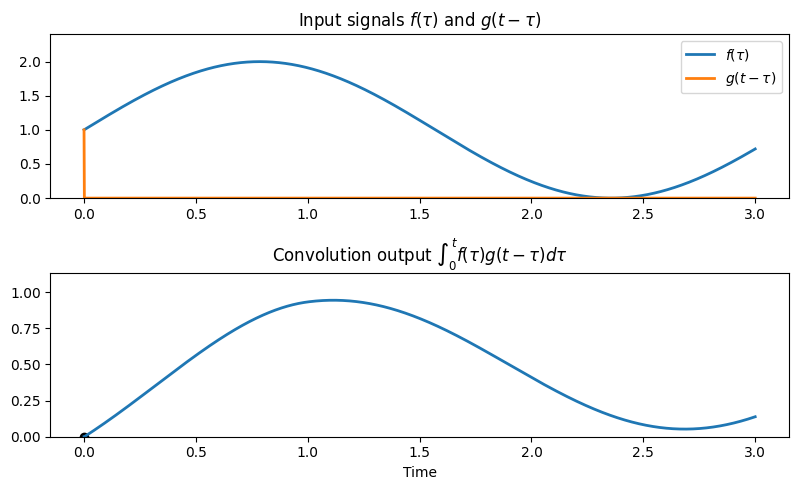

In [172]:

# Figure setup
fig, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].set_title("Input signals $f(\\tau)$ and $g(t-\\tau)$")
axs[1].set_title("Convolution output $\int_0^t f(\\tau) g(t-\\tau) d\\tau$")
t0 = 0.0
line_f, = axs[0].plot(tau, f_tau, lw=2, label='$f(\\tau)$')
line_g, = axs[0].plot(tau, tri_decreasing(t0 - tau), lw=2, label='$g(t-\\tau)$')
overlap = np.where(f_tau * tri_decreasing(t0 - tau) > 0)[0]
# fill_area = axs[0].fill_between(tau[overlap], 0, np.minimum(f_tau[overlap], tri_decreasing(t0 - tau)[overlap]), color='black', alpha=0.3)
line_y, = axs[1].plot(tau, y_conv, lw=2)
dot = axs[1].scatter(t0, 0.0, color='black')

axs[0].legend()
axs[0].set_ylim(0, max(f_tau)*1.2)
axs[1].set_ylim(0, max(y_conv)*1.2)

axs[1].set_xlabel("Time")
plt.tight_layout()


# Animation function
def update(frame):
    global dot
    # Shift and flip h
    h_shifted = tri_decreasing(frame - tau)
    # Convolution integral (numerical)
    # overlap = np.where(f_tau * h_shifted > 0)[0]
    dot.remove()
    # fill_area = axs[0].fill_between(tau[overlap], 0, np.minimum(f_tau[overlap], h_shifted[overlap]), color='black', alpha=0.3)
    conv_value = np.interp(frame, tau, y_conv)
    dot = axs[1].scatter(frame, conv_value, color='black')
    
    
    line_g.set_ydata(h_shifted)

    return line_y

ani = FuncAnimation(
    fig,
    update,
    frames=tau[::25],
    interval=50
)

In [173]:
HTML(ani.to_jshtml())

In [174]:
# Save the animation as a GIF using PillowWriter
writer = PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('animated_sine.gif', writer=writer)

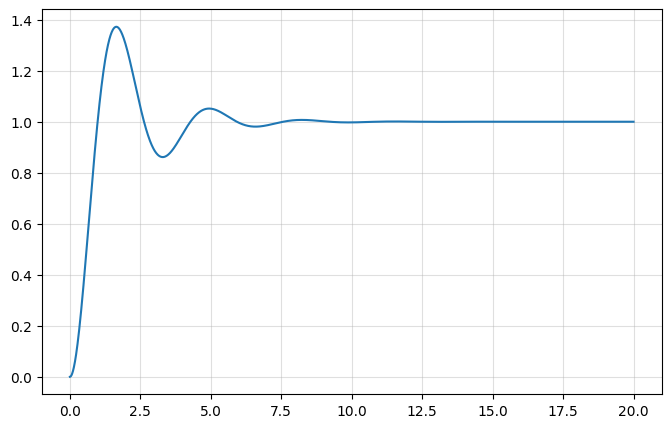

In [185]:
t = np.linspace(0, 20, 2000)
omega_n = 2.0
zeta = 0.3
K = 1.0
omega_d = omega_n * np.sqrt(1 - zeta**2)
step_response = 1 - np.exp(-zeta * omega_n * t) * (np.cos(omega_d * t) + (zeta * omega_n / omega_d) * np.sin(omega_d * t))
plt.figure(figsize=(8,5))
plt.grid(alpha=0.4)
plt.plot(t, step_response)
plt.savefig('step_response.svg', dpi=300)


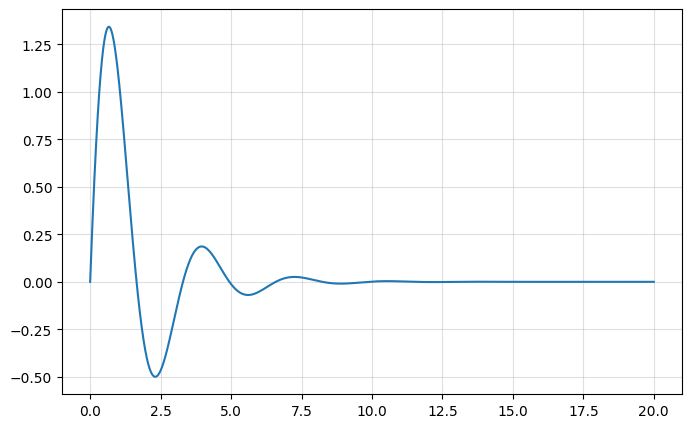

In [187]:
t = np.linspace(0, 20, 2000)
omega_n = 2.0
zeta = 0.3
K = 1.0
omega_d = omega_n * np.sqrt(1 - zeta**2)
impulse_response = omega_n**2 / omega_d * np.exp(-zeta * omega_n * t) * np.sin(omega_d * t)
plt.figure(figsize=(8,5))
plt.grid(alpha=0.4)
plt.plot(t, impulse_response)
plt.savefig('impulse_response.svg', dpi=300, transparent=True)